In [16]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [63]:
class Trebuchet:
    def __init__(self, arm_ratio, pivot_height, arm_length):
        self.arm_ratio = arm_ratio
        self.pivot_height = pivot_height
        self.arm_length = arm_length
        self.angle = 60
        self.g = 9.81

    def launch_parameters(self, distance, angle):
        # Начальная скорость на основе длины рычага и массы
        v0 = np.sqrt((self.g * distance) / (2 * np.tan(angle) * np.cos(angle)**2))
        print(f"Launching missile with angle: {np.degrees(angle):.2f} degrees and v0: {v0:.2f} m/s")
        return v0

    def trajectory(self, v0, angle):
        v_y = v0 * np.sin(angle)
        v_x = v0 * np.cos(angle)
        print(f"Vx: {v_x}, Vy: {v_y}")
        first_path_time = v_y / self.g                                          # Время до достижения наивысшей точки
        max_y = v_y * first_path_time - 0.5 * self.g * (first_path_time ** 2) + self.pivot_height      # Перемещение по y до высочайшей точки
        second_path_time = math.sqrt(2 * height_descent / self.g)                   # Время от высшей точки до падения
        total_time = first_path_time + second_path_time                             # Время всего пути
        print(f"Flight time: {total_time} s, x_move: {v_x * total_time} m, y_move: {height_ascent - height_descent} m")

        t = np.linspace(0, total_time, num=1000)
        x = v_x * t
        # print(x[:-1])
        y = self.pivot_height + v_y * t - 0.5 * self.g * t**2
        # Ограничение y так, чтобы оно не было меньше 0
        y = np.maximum(0, y)
        return t, x, y

    def visualize(self, mass, distance, angle=None):
        if angle:
            angle = np.radians(angle)
        v0 = self.launch_parameters(distance, angle)
        t, x, y = self.trajectory(v0, angle)

        plt.figure(figsize=(10, 5))
        plt.plot(x, y, label='Траектория снаряда')
        plt.xlabel('Дистанция (м)')
        plt.ylabel('Высота (м)')
        plt.title('Траектория полета снаряда требушета')
        plt.grid(True)

        plt.legend()
        plt.show()

Launching missile with angle: 45.00 degrees and v0: 2.21 m/s
Vx: 1.5660459763365828, Vy: 1.5660459763365828
Flight time: 0.4361383460081908 s, x_move: 0.6830127018922195 m, y_move: -0.25 m


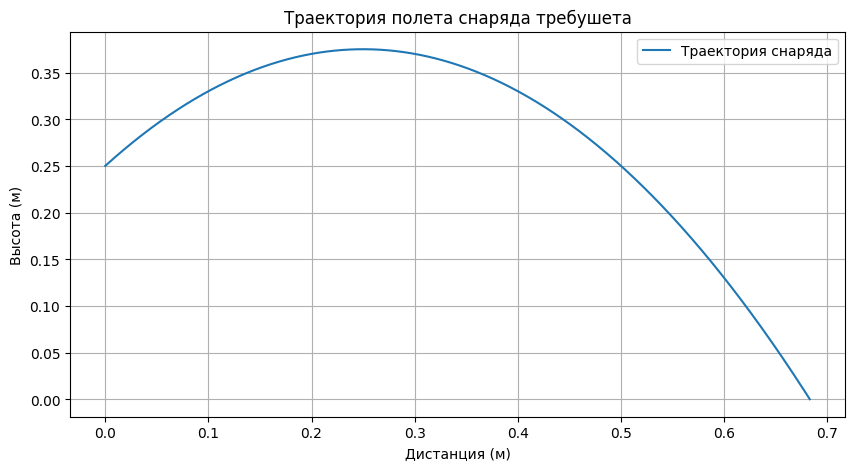

In [64]:
trebuchet = Trebuchet(arm_ratio=0.2, pivot_height=0.25, arm_length=0.25)
trebuchet.visualize(mass=0.1, distance=0.5, angle=45)